In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import healpy as hp
from scipy.spatial import ConvexHull
import meshio
import scipy

In [20]:
from pygsp.graphs import Graph
from scipy import sparse

class FullSphereEquiangular(Graph):
    """Modified from the class implemented by Droxef
    https://github.com/Droxef/PDMdeepsphere/
    """
    
    def __init__(self, bw=64, kernel_width=0.1):
       
        self.bw = bw

        ## sampling and coordinates calculation
       
        alpha = np.arange(2 * bw) * np.pi / bw
          
        l = 0.4
        alpha1 = np.linspace(0, l, 20)
        alpha2 = np.linspace(l, np.pi-l, 20)
        alpha3 = np.linspace(np.pi-l, np.pi, 20)
        
        beta = np.concatenate([alpha1, alpha2, alpha3])
        
        
        theta, phi = np.meshgrid(*(beta, alpha),indexing='ij')
        ct = np.cos(theta).flatten()
        st = np.sin(theta).flatten()
        cp = np.cos(phi).flatten()
        sp = np.sin(phi).flatten()
        x = st * cp
        y = st * sp
        z = ct
        coords = np.vstack([x, y, z]).T
        coords = np.asarray(coords, dtype=np.float32)
        self.coords = coords[2*bw-1:]

<IPython.core.display.Javascript object>


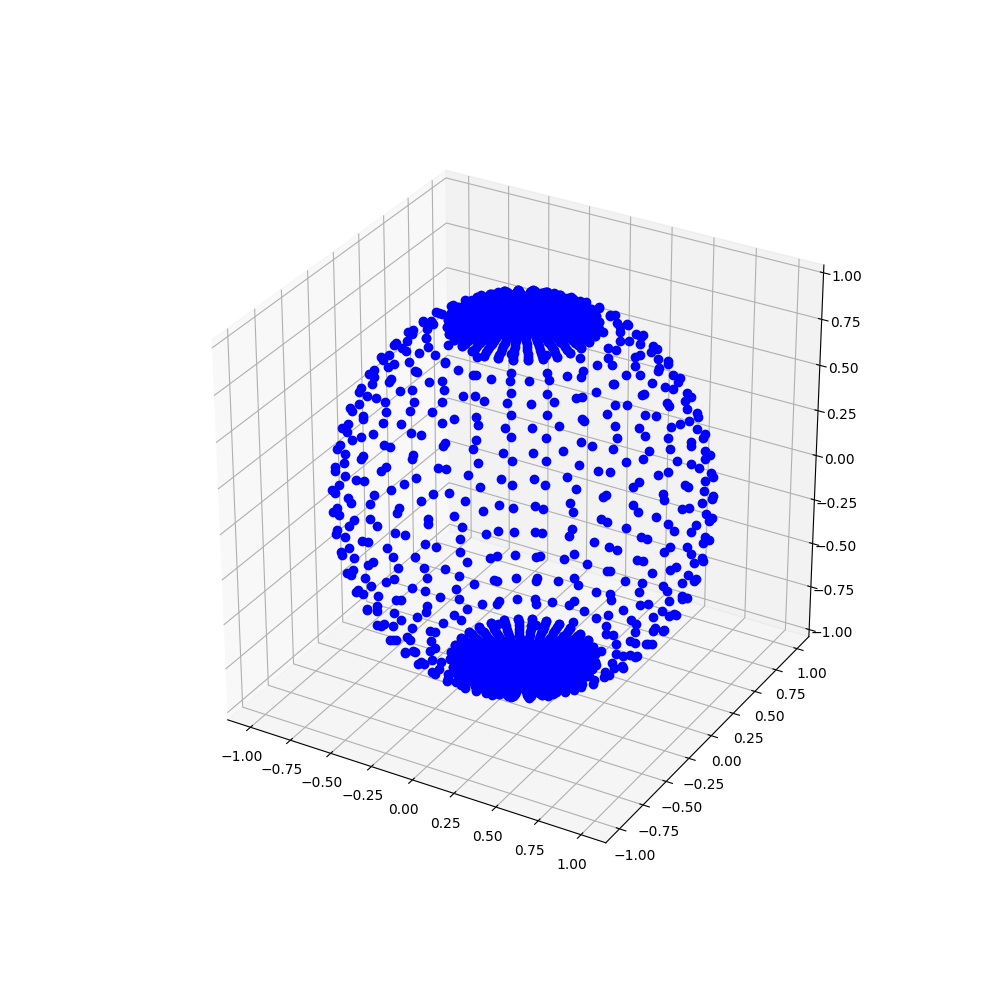

(1889, 3)


In [25]:
sphere = FullSphereEquiangular(bw=16)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sphere.coords[:,0], sphere.coords[:,1], sphere.coords[:,2], 'bo')
print(sphere.coords.shape)

<IPython.core.display.Javascript object>


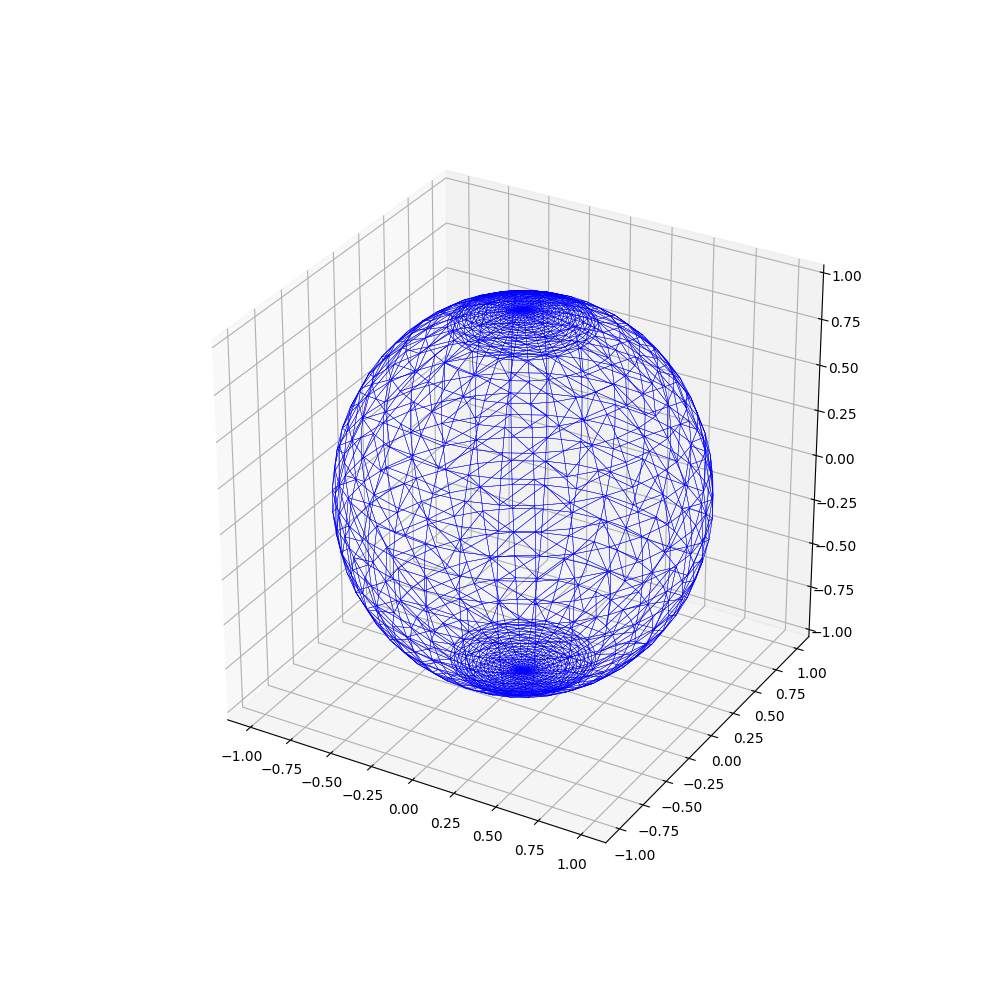

In [26]:
coords = sphere.coords

tri = ConvexHull(coords)
tri.simplices.shape

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for simplex in tri.simplices:
    s = simplex.copy()
    s = np.append(s, simplex[0])
    ax.plot(coords[s][:,0], coords[s][:,1], coords[s][:,2], 'b-', LineWidth=0.3)


In [27]:
for bw in [4, 8, 16]:
    sphere = FullSphereEquiangular(bw=bw)
    coords = sphere.coords

    tri = ConvexHull(coords)
    tri.simplices.shape

    cells = {"triangle": tri.simplices}
    meshio.write_points_cells(
        "meshes/imbalanced_{}.xml".format(bw),
        coords,
        cells,
        )